# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import json
import tabulate
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()

# Fetch current ETH price
eth_price = requests.get(eth_url).json()

#print(json.dumps(eth_price, indent=4))
btc_price = btc_price['data']['1']['quotes']['CAD']['price']
eth_price = eth_price['data']['1027']['quotes']['CAD']['price']
#Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56917.07
The current value of your 5.3 ETH is $17098.14


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [35]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-28", tz="America/Toronto").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

/home/hkolli/miniconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  from ipykernel import kernelapp as app


AGG                                      SPY  \
                             open    high     low   close    volume   open   
time                                                                         
2022-01-28 00:00:00-05:00  111.46  111.86  111.44  111.81  10400422  432.7   

                                                           
                          high     low   close     volume  
time                                                       
2022-01-28 00:00:00-05:00  442  427.82  441.92  142062305

In [36]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
for ticker in ['AGG','SPY']:
    df_closing_prices[ticker] = df_portfolio[ticker]["close"]

agg_close_price = df_closing_prices['AGG']
spy_close_price = df_closing_prices['SPY']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $time
2022-01-28 00:00:00-05:00    111.81
Name: AGG, dtype: float64
Current SPY closing price: $time
2022-01-28 00:00:00-05:00    441.92
Name: SPY, dtype: float64


In [39]:
# Compute the current value of shares
my_spy_value = float(spy_close_price) * my_spy
my_agg_value = float(agg_close_price) * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22096.00
The current value of your 200 AGG shares is $22362.00


### Savings Health Analysis

In [38]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
data = {'amount':   
            {
                'crypto':19385.986877,
                'shares':40616.500000
            }
        }
# Create savings DataFrame
df_savings = pd.DataFrame(data)

# Display savings DataFrame
#display(df_savings)
df_savings

,amount
crypto,19385.986877
shares,40616.500000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

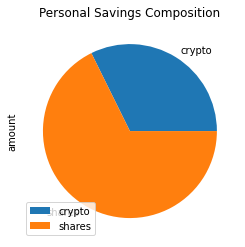

In [41]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', y = 'amount', title = 'Personal Savings Composition')

In [42]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = data['amount']['crypto'] + data['amount']['shares']

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough savings for an emergency fund.")
elif(total_savings == emergency_fund):
    print("Congratulations! You have reached savings goal for an emergency fund.")
else:
    print(f"You need ${emergency_fund - total_savings} dollars in savings for an emergency fund.")

Congratulations! You have enough savings for an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [45]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
#end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [47]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=today,
    limit = 1000
).df

# Display sample data
df_stock_data.dropna().head()

/home/hkolli/miniconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-09 00:00:00-05:00  106.78  107.0700  106.7000  106.76  5603974   
2018-02-12 00:00:00-05:00  106.74  106.9450  106.6632  106.77  5075086   
2018-02-13 00:00:00-05:00  106.79  106.9100  106.7000  106.83  3689890   
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2018-02-09 00:00:00-05:00  260.80  263.61  252.92  261.67  207357854  
2018-02-12 00:00:00-05:00  263.87  267.01  261.88  265.26   99933794  
2018-02-13 00:00:00-05:00  263.94  266.62  263.31  266.01   56891150  
2018-02-14 00:00:00-05:00  264.47  270.00  263.97  269.71   86705860  
2018-02-15 00:00:00-05:00  271.59  273.01  268.77  273.00   72021939

In [50]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.4,0.6],
    num_simulation=500,
    num_trading_days=252*30
)

In [49]:
# Printing the simulation input data
mc_simulation.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-09 00:00:00-05:00  106.78  107.0700  106.7000  106.76  5603974   
2018-02-12 00:00:00-05:00  106.74  106.9450  106.6632  106.77  5075086   
2018-02-13 00:00:00-05:00  106.79  106.9100  106.7000  106.83  3689890   
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-09 00:00:00-05:00          NaN  260.80  263.61  252.92  261.67   
2018-02-12 00:00:00-05:00     0.000094  263.87  267.01  261.88  265.26   
2018-02-13 00:00:00-05:00     0.000562  263.94  266.62  263.31  266.01   
2018-02-14 00:00:00-05:00    -0.003463  264.47  270.00  263.97  269.71   
2018-02-15 00:00:00-05:00     0.001221  271.59  273.01  268.77  273.00   

                                                   
                              volume daily_return  
time                                               
2018-02-09 00:00:00-05:00  207357854          NaN  
2018-02-12 00:00:00-05:00   99933794     0.013720  
2018-02-13 00:00:00-05:00   56891150     0.002827  
2018-02-14 00:00:00-05:00   86705860     0.013909  
2018-02-15 00:00:00-05:00   72021939     0.012198

In [51]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/hkolli/FinTech/usyd-syd-fin-pt-12-2021-u-c/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993098,0.998481,0.998733,1.002554,1.013259,0.991361,1.001402,1.000870,1.008600,0.999887,...,1.002583,0.998305,1.008457,0.995984,0.998746,0.998942,1.016328,0.998176,1.009382,1.012839
2,1.000014,0.997960,0.995685,1.000677,1.003508,0.986638,1.008793,0.994037,1.008282,1.007046,...,1.007099,0.996162,1.015953,1.002188,0.998211,0.999605,1.009978,1.012002,1.012034,1.015062
3,0.999130,0.997489,0.998101,0.999688,0.992184,0.980451,1.006782,1.000743,1.002272,1.007758,...,1.017518,0.999224,1.005633,0.996727,0.987708,1.005983,1.005649,1.009115,1.017149,1.022716
4,1.009426,0.994656,1.006138,0.999732,1.007263,0.982260,1.001167,1.001525,1.011102,1.014992,...,1.016780,0.997857,1.003745,0.991654,0.991743,1.003047,1.011806,1.008680,1.020011,1.031505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.655229,8.435745,7.022801,7.472947,18.906377,5.186993,7.782702,1.694364,14.019048,5.876554,...,6.566716,6.800158,18.998996,12.243306,5.663142,9.938932,25.730612,5.776996,9.074147,6.499346
7557,11.643339,8.332293,7.018784,7.475354,18.753479,5.135678,7.810749,1.699847,14.024935,5.844715,...,6.600302,6.892039,18.789546,12.339668,5.691392,9.945859,25.649991,5.778541,9.061134,6.484890
7558,11.630801,8.464451,7.159560,7.469573,18.845055,5.120047,7.693797,1.673637,14.082500,5.880397,...,6.531976,6.873010,18.994195,12.387842,5.724408,10.033003,25.761188,5.803625,9.042297,6.486634
7559,11.700304,8.460962,7.254408,7.429621,18.862378,5.048435,7.747241,1.656553,14.181315,5.826274,...,6.513177,6.868582,19.096520,12.353406,5.777175,9.964671,25.775677,5.783422,9.115985,6.510852


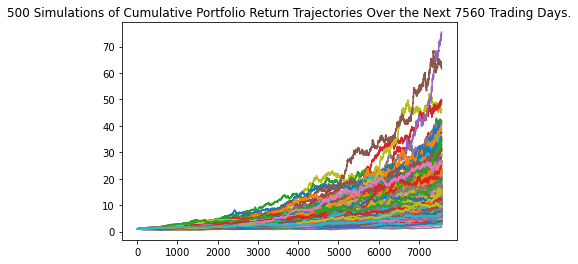

In [52]:
# Plot simulation outcomes
line_plot = mc_simulation.plot_simulation()

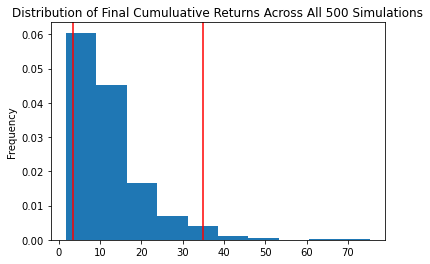

In [53]:
# Plot probability distribution and confidence intervals
prob_dist = mc_simulation.plot_distribution()

### Retirement Analysis

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = mc_simulation.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             12.416445
std               8.740085
min               1.664128
25%               6.636674
50%               9.849553
75%              15.181893
max              75.425748
95% CI Lower      3.352090
95% CI Upper     34.871639
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [55]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $67041.81 and $697432.79


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [56]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $100562.71 and $1046149.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [60]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_simulation_5 = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.4,0.6],
    num_simulation=500,
    num_trading_days=252*5
)

In [61]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_simulation_5.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-09 00:00:00-05:00  106.78  107.0700  106.7000  106.76  5603974   
2018-02-12 00:00:00-05:00  106.74  106.9450  106.6632  106.77  5075086   
2018-02-13 00:00:00-05:00  106.79  106.9100  106.7000  106.83  3689890   
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-09 00:00:00-05:00          NaN  260.80  263.61  252.92  261.67   
2018-02-12 00:00:00-05:00     0.000094  263.87  267.01  261.88  265.26   
2018-02-13 00:00:00-05:00     0.000562  263.94  266.62  263.31  266.01   
2018-02-14 00:00:00-05:00    -0.003463  264.47  270.00  263.97  269.71   
2018-02-15 00:00:00-05:00     0.001221  271.59  273.01  268.77  273.00   

                                                   
                              volume daily_return  
time                                               
2018-02-09 00:00:00-05:00  207357854          NaN  
2018-02-12 00:00:00-05:00   99933794     0.013720  
2018-02-13 00:00:00-05:00   56891150     0.002827  
2018-02-14 00:00:00-05:00   86705860     0.013909  
2018-02-15 00:00:00-05:00   72021939     0.012198

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/hkolli/FinTech/usyd-syd-fin-pt-12-2021-u-c/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

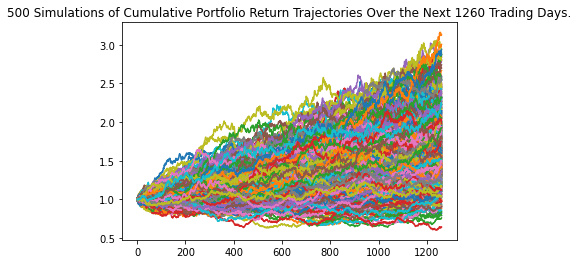

In [62]:
# Plot simulation outcomes
line_plot_5 = mc_simulation_5.plot_simulation()

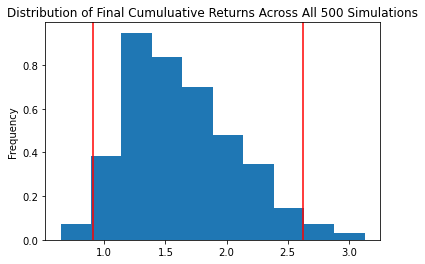

In [63]:
# Plot probability distribution and confidence intervals
prob_plot_5 = mc_simulation_5.plot_distribution()

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5 = mc_simulation_5.summarize_cumulative_return()

# Print summary statistics
summary_5

count           500.000000
mean              1.628363
std               0.452123
min               0.641782
25%               1.303307
50%               1.560906
75%               1.910284
max               3.131631
95% CI Lower      0.907792
95% CI Upper      2.629205
Name: 1260, dtype: float64

In [65]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*initial_investment,2)
ci_upper_five = round(even_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $201125.43 and $2092298.36


### Ten Years Retirement Option

In [66]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_simulation_ten = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.4,0.6],
    num_simulation=500,
    num_trading_days=252*10
)

In [67]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_simulation_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/hkolli/FinTech/usyd-syd-fin-pt-12-2021-u-c/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984490,1.003498,0.993558,1.012839,1.001204,0.984364,0.989711,1.010849,1.007439,1.008970,...,0.993103,1.011939,0.988018,1.007592,0.983519,1.002379,1.002210,1.005372,0.996471,1.000172
2,0.977779,1.012346,0.989380,1.006513,0.996940,0.973650,0.988513,1.005723,1.014050,1.010451,...,1.006343,1.013416,0.980548,0.999663,0.997540,1.002868,1.006322,1.006162,0.998747,0.992259
3,0.990445,1.025509,0.995256,1.001259,0.998589,0.964846,0.988763,1.013076,1.018860,1.010192,...,1.004938,1.010720,0.976687,1.004156,1.000960,1.002112,0.999624,1.001048,1.009069,0.996901
4,1.006770,1.036981,0.998039,1.000968,0.996123,0.963955,0.998559,1.002615,1.015623,1.011052,...,0.992542,1.012703,0.979302,1.009824,0.993926,0.995183,0.992414,0.993314,1.003211,0.993818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.636636,2.722360,2.307709,3.230304,1.874528,2.267512,1.526946,2.776815,2.978293,2.691646,...,2.217048,2.800270,2.871373,2.711508,3.151772,1.611858,2.664842,2.522788,2.444477,4.912101
2517,1.658576,2.721670,2.316378,3.238048,1.875089,2.257038,1.519398,2.768507,2.995164,2.690555,...,2.193222,2.791682,2.890687,2.736694,3.160824,1.611113,2.658927,2.513680,2.469996,4.951250
2518,1.664348,2.711476,2.307679,3.199359,1.869760,2.282454,1.521911,2.753189,3.010286,2.665659,...,2.210801,2.798840,2.893556,2.767394,3.133316,1.625870,2.648308,2.541989,2.497188,4.899053
2519,1.651119,2.705087,2.310168,3.182330,1.887713,2.287964,1.517661,2.746171,3.053713,2.703136,...,2.166556,2.812886,2.873538,2.763663,3.150346,1.645299,2.645656,2.569495,2.503064,4.914118


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

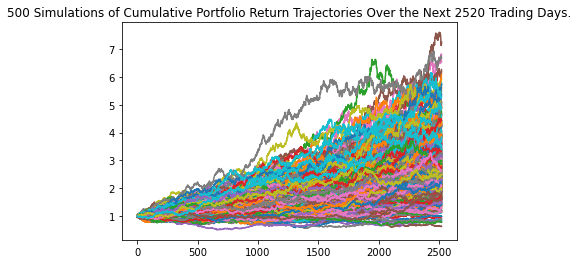

In [68]:
# Plot simulation outcomes
mc_simulation_ten.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

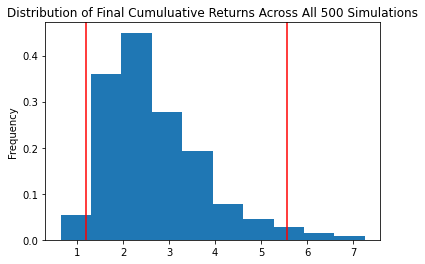

In [69]:
# Plot probability distribution and confidence intervals
mc_simulation_ten.plot_distribution()

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_ten = mc_simulation_ten.summarize_cumulative_return()

# Print summary statistics
summary_ten

count           500.000000
mean              2.685653
std               1.095134
min               0.631671
25%               1.904945
50%               2.424336
75%               3.244231
max               7.258286
95% CI Lower      1.176720
95% CI Upper      5.557709
Name: 2520, dtype: float64

In [73]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*initial_investment,2)
ci_upper_ten = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $67041.81 and $697432.79
